# EDA
Exploratory data analysis using supermarket sales data

In [ ]:
# Install
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install missingno
!pip3 install geopy
!pip3 install folium
!pip3 install dataframe_image

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

# Visualizing NaN values
import missingno as msno

# Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Calendar
import calendar

# Geocode
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import folium
from folium import plugins
import ipywidgets
from branca.element import Figure

# Plotly Options and Config
pio.templates.default = 'plotly_white'
config = {'displayModeBar': False}
colors_x = ['#E0C95A', '#CBE0CA', '#E0864E', '#CDCCE3', '#E3B8D1']
cmaps = 'Blues'

In [3]:
# Read data - CSV file
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Location of the branches

In [4]:
city_data = df.City.unique()
cities = pd.DataFrame(data = city_data, columns = {'city_name'})
cities

nom = Nominatim(user_agent='Kaggle')

def geo_cities(cities):
    lat = []
    long = []
    flag = 0
    for city in cities['city_name']:
      location = nom.geocode(city)
      try:
        lat.append(location.latitude)
        long.append(location.longitude)
        print(flag)
      except:
        lat.append('NA')
        long.append('NA')
      flag += 1
    cities['Latitude'] = lat
    cities['Longitude'] = long 
    
#geo_cities(cities)
# The geocoding doesn't seem to work in  kaggle notebook so i'll manually add  the output here.

cities = pd.DataFrame({'city_name': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.79671316,19.690708,21.981275],
                       'Longitude' : [96.160992, 96.165883, 96.082375]})

supermarket_geo = folium.Map(location = [19.680708,	96.265883], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

fig = Figure(width = 800, height = 600)
fig.add_child(supermarket_geo)

for (index, row) in cities.iterrows():
  folium.Marker(location = [row.loc['Latitude'], row.loc['Longitude']], popup = row.loc['city_name'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(supermarket_geo)

supermarket_geo

## Variable transformations
Change the date variable to date

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()

## Set the Date as the index of the dataset

In [6]:
df.set_index('Date', inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


# Univariate analysis

## Question 1
*What does the customer rating look like and is it skewed?*

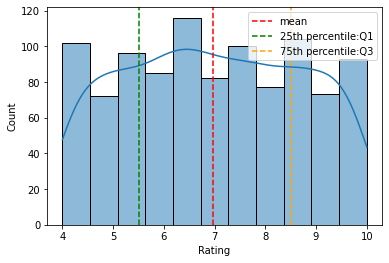

In [36]:
sns.histplot(df['Rating'], kde=True)
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()
plt.savefig("uni1.png") 

The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution.

We can plot the mean and the percentiles to show this as well.

The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th quartiles respectively.

The mean rating is ~7 across products.

## Question 2
*Is there any difference in aggregate sales across branches?*

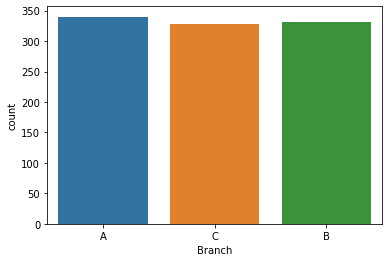

In [35]:
sns.countplot(x=df['Branch'])
df['Branch'].value_counts()
plt.savefig("uni2.png") 

There is not much difference in sales across the 3 branches of A, B and C. 
The sales in branch A is a bit higher than the rest of the branches.

## Question 3
*Which is the most pouplar payment method used by customers?*

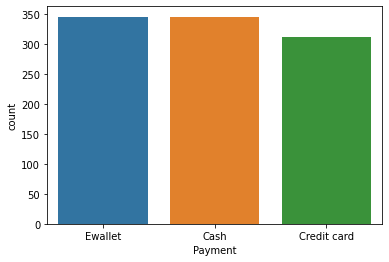

In [34]:
sns.countplot(x=df['Payment'])
plt.savefig("uni3.png")

The most popular payment method is E-wallet and not credit cards.
Cash payment is also popular

## Bi-variate analysis
Let us consider two (bi) variables together and look at the interaction/relationship between them. 

This is bi-variate analysis that can help to draw important conclusions about the data.
Let us consider gross income and try to answer the following questions:

## Question 4
*Does gross income affect the ratings that the customers provide?*

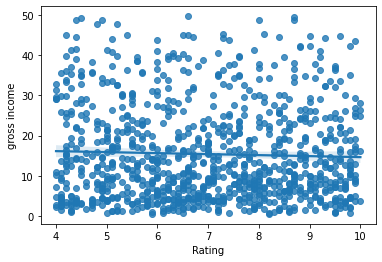

In [33]:
sns.regplot(x=df['Rating'], y=df['gross income'])
plt.savefig("uni4.png")

*As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between gross income of a customer and his rating.*

## Question 5: 
*Which branch is the most profitable?*

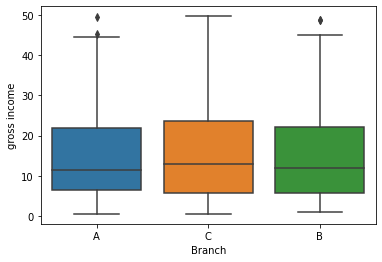

In [32]:
sns.boxplot(x=df['Branch'], y=df['gross income'])
plt.savefig("uni5.png")

*There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B, As observed earlier, though branch A has slightly higher sales than the rest C is the most profitable branch in terms of gross income.*

## Question 6 
*What is the relationship between Gender and Gross income?*

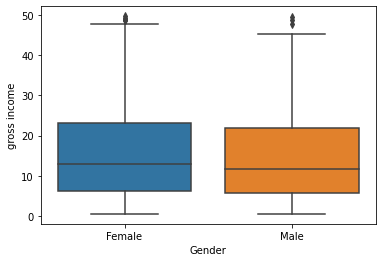

In [31]:
sns.boxplot(x=df['Gender'], y=df['gross income'])
plt.savefig("uni6.png")

*Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.*

## Question 7
*Is there any time trend in gross income?*

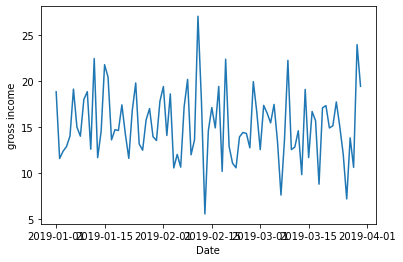

In [30]:
df.groupby(df.index).mean()
sns.lineplot(x= df.groupby(df.index).mean().index, 
             y = df.groupby(df.index).mean()['gross income'])
plt.savefig("uni7.png")

*No particular time trend except for some days the gross income is pretty high and some days it is pretty low. Overall it remains at a certain average level.*

## Question 8
*Which product line generates most income?*

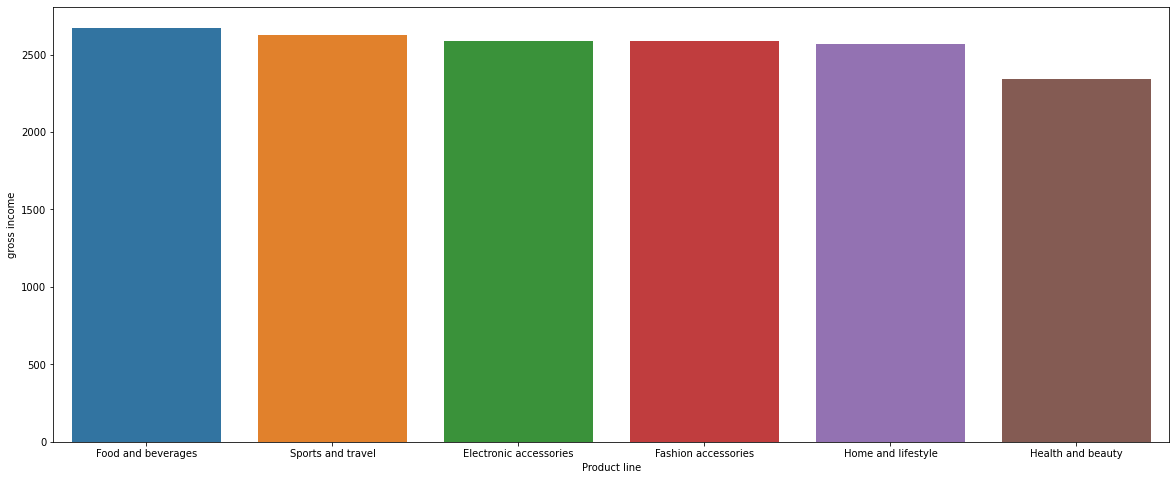

In [29]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)
plt.savefig("uni8.png")

*Gross income is highest in sports and travel.*

# Correlation analysis
## Individual correlations

In [17]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

## Pairwise correlations

In [18]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


# Other analysis
## Question 10
*What is the spending patterns of females and males and in which category do they spend a lot?*

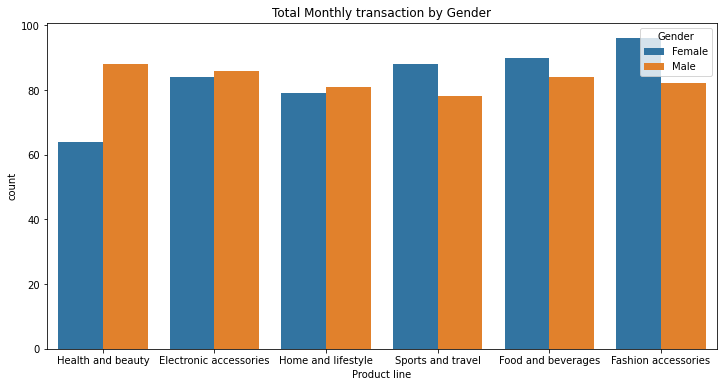

In [28]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(x=df['Product line'], hue = df.Gender)
plt.savefig("uni10.png")

*Females spend on 'fashion accessories' the most and for males surprisingly it is 'Health and beauty'. Females also spend more on 'Sports and travel'.*

# Dummy method

In [21]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
Date,,
2019-01-05,1,0
2019-03-08,1,0
2019-03-03,0,1
2019-01-27,0,1
2019-02-08,0,1


Join the Gender dummies with the original data

In [22]:
df1 = pd.concat([df, gender_dummies], axis = 1)
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Female,Male
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,0
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,1,0
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,0,1
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,0,1
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,0,1


# Spending pattern of Female

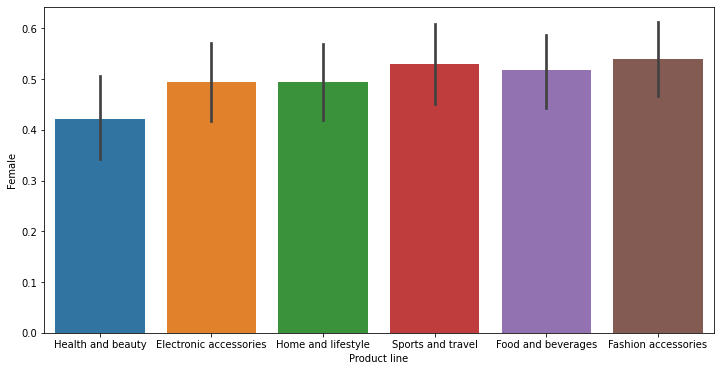

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df1)
plt.savefig("uni13.png")

## Question 10
*How many products are bought by customers?*

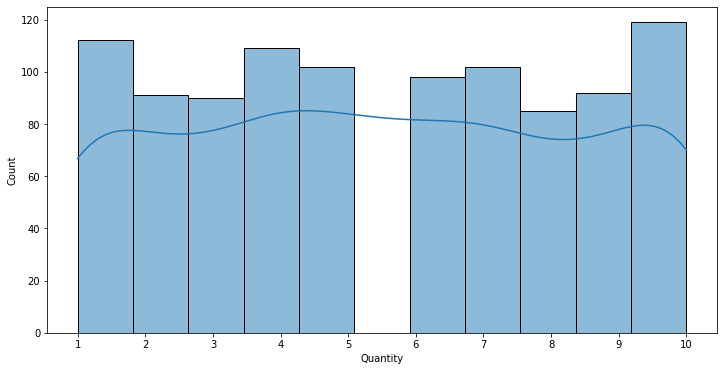

In [26]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.histplot(df['Quantity'], kde=True)
plt.xticks(xdata)
plt.savefig("uni14.png")

## Question 11
*Which day of the week has maximum sales?*

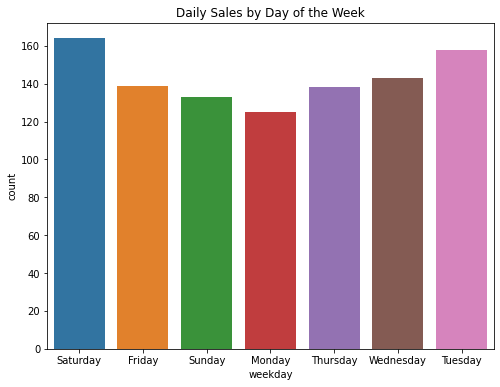

In [45]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(x=df['weekday'])
plt.savefig("uni15.png")

Sales is highest on Saturdays probably because it is the weekend. 

Tuesdays is a close second. Mondays is the lowest in sales.

## Question 12 
*Which hour of the day is the busiest?*

In [50]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [51]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Hour
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2022-04-23 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,13
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2022-04-23 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2022-04-23 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,13
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2022-04-23 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,20
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2022-04-23 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2022-04-23 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,13
2019-03-02,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2022-04-23 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,17
2019-02-09,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2022-04-23 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Saturday,13


In [ ]:
sns.lineplot(x="Hour", y='Quantity', data=df).set_title("Product Sales per Hour")

In [49]:
df.index.is_unique

False

In [52]:
df.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,